# Bonus B:案例演練-使用Seaborn發現辛普森悖論

In [1]:
import pandas as pd

In [2]:
dia = pd.read_csv('data/diamonds.csv')
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
dia2 = (dia
    .assign(cut=pd.Categorical(dia['cut'], 
                 categories=cut_cats,
                 ordered=True),
            color=pd.Categorical(dia['color'], 
                 categories=color_cats,
                 ordered=True),
            clarity=pd.Categorical(dia['clarity'], 
                 categories=clarity_cats,
                 ordered=True))
)
dia2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

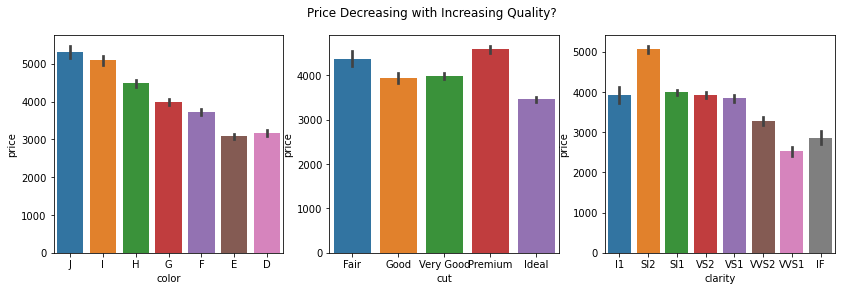

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=dia2, ax=ax1)
sns.barplot(x='cut', y='price', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='price', data=dia2, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

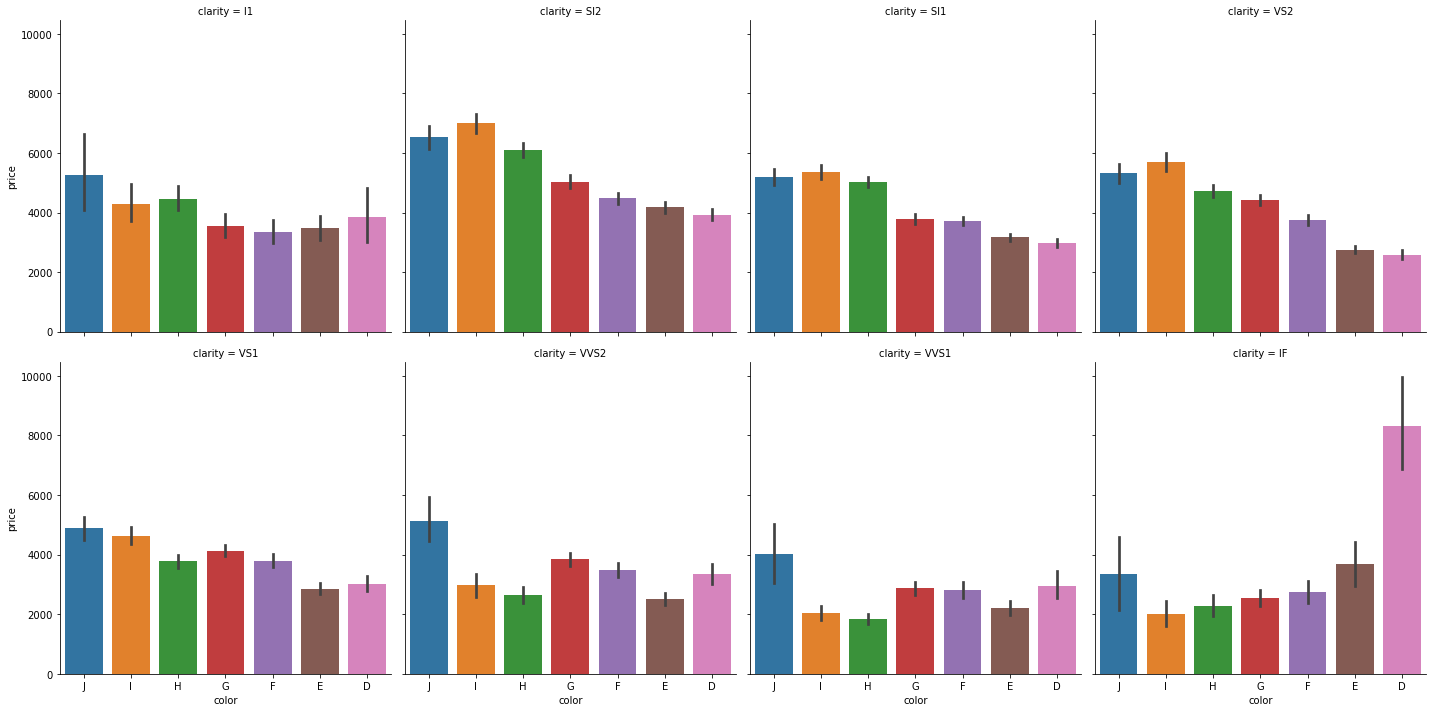

In [5]:
grid = sns.catplot(x='color', y='price', col='clarity',
                   col_wrap=4, data=dia2, kind='bar')

Text(0.5, 0.98, 'Diamond size decreases with quality')

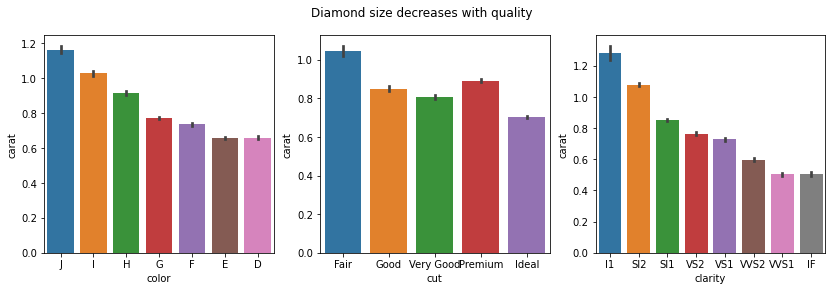

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=dia2, ax=ax1)
sns.barplot(x='cut', y='carat', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='carat', data=dia2, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

In [7]:
dia2 = (dia2
    .assign(carat_category=pd.qcut(dia2.carat, 5))
)

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

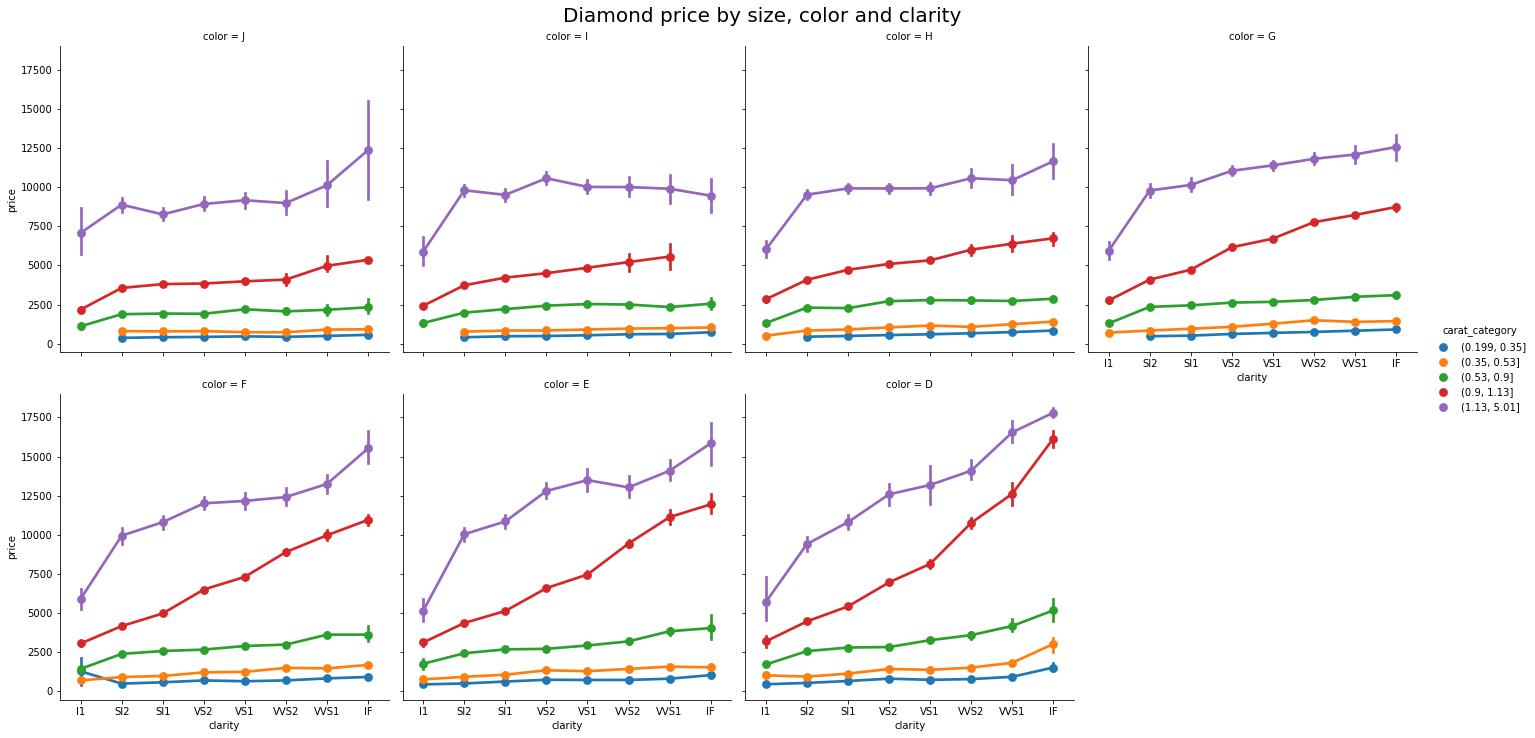

In [8]:
from matplotlib.cm import Greys
import numpy as np
greys = Greys(np.arange(50,250,40))
grid = sns.catplot(x='clarity', y='price', data=dia2,
                   hue='carat_category', col='color',
                   col_wrap=4, kind='point')
grid.fig.suptitle('Diamond price by size, color and clarity',
                  y=1.02, size=20)

Text(0.5, 1.02, 'Replication of Step 3 with PairGrid')

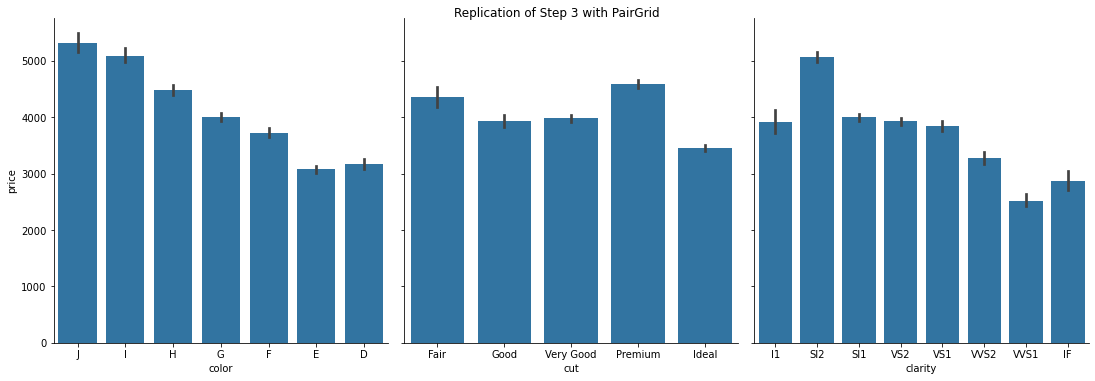

In [9]:
g = sns.PairGrid(dia2, height=5,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)